In [2]:
# %load /home/sid/libs.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.io.arff import loadarff
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
def big_data_prep(*files):
   big_data = [pd.DataFrame(loadarff(file)[0]) for file in files]
   return pd.concat(big_data)

In [4]:
big_data = big_data_prep('data/1year.arff', 'data/2year.arff', 'data/3year.arff', 'data/4year.arff', 'data/5year.arff')

In [5]:
big_data['class'] = [int(n) for n in big_data['class']]

In [15]:
big_data.isnull().sum().sort_values(ascending=False)

Attr37    18984
Attr21     5854
Attr27     2764
Attr60     2152
Attr45     2147
Attr24      922
Attr28      812
Attr64      812
Attr54      812
Attr53      812
Attr41      754
Attr32      368
Attr52      301
Attr47      297
Attr46      135
Attr12      134
Attr33      134
Attr40      134
Attr4       134
Attr63      134
Attr19      128
Attr31      127
Attr62      127
Attr20      127
Attr30      127
Attr49      127
Attr56      127
Attr23      127
Attr39      127
Attr13      127
          ...  
Attr26       95
Attr17       94
Attr34       94
Attr50       94
Attr8        94
Attr5        89
Attr58       84
Attr11       44
Attr15       36
Attr9         9
Attr48        9
Attr10        8
Attr2         8
Attr3         8
Attr7         8
Attr6         8
Attr1         8
Attr14        8
Attr18        8
Attr22        8
Attr25        8
Attr29        8
Attr35        8
Attr36        8
Attr38        8
Attr51        8
Attr57        7
Attr59        7
Attr55        1
class         0
Length: 65, dtype: int64

In [17]:
big_data.copy().dropna(how='all').shape

(43405, 65)

In [18]:
big_data.shape

(43405, 65)

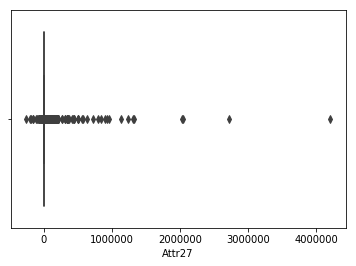

In [35]:
sns.boxplot(big_data['Attr27'])

In [38]:
big_data['Attr27'].value_counts().sort_values()

 0.05812         1
 7.13340         1
-11.65200        1
 0.57189         1
-0.34083         1
 0.49595         1
 7.14340         1
 11.68900        1
 0.69065         1
 0.92421         1
 1.71870         1
 0.19290         1
 0.20459         1
 0.50795         1
 13.81100        1
 5.52050         1
 1.82890         1
 1.69750         1
 0.53107         1
 8.64650         1
 1.10930         1
 0.61329         1
 2.31900         1
 0.19874         1
 0.45489         1
 0.12799         1
-884.24000       1
-3.95010         1
 15.55800        1
 2.06140         1
              ... 
 1.18030         4
 1.08200         4
 2.25000         4
 2.00000         4
 1.28640         4
 1.02980         4
 15.69700        4
 16.15200        4
 1.15110         4
 1.09100         4
 1.36630         4
 1.57170         4
 1.17620         4
 1.25660         4
 2.10010         4
 1.16430         4
 1.25690         4
 1.35740         4
 1.86440         4
 1.41700         4
 2.22730         5
 8.64990    

In [58]:
test_data = big_data[['Attr27','class']]

In [59]:
data27 = test_data[test_data['class'] == 1]['Attr27']

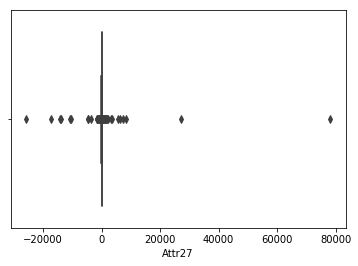

In [60]:
sns.boxplot(data27)

In [61]:
data27.describe()

count     1376.000000
mean        31.914293
std       2523.111700
min     -25819.000000
25%         -3.101275
50%          0.831040
75%          3.413400
max      78115.000000
Name: Attr27, dtype: float64

In [62]:
data27_2 = data27.dropna().copy()

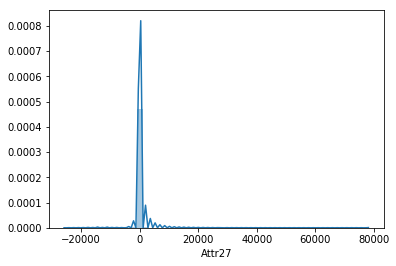

In [63]:
sns.distplot(data27_2)

In [66]:
data27.fillna(value=0.83, inplace=True)

/home/sid/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


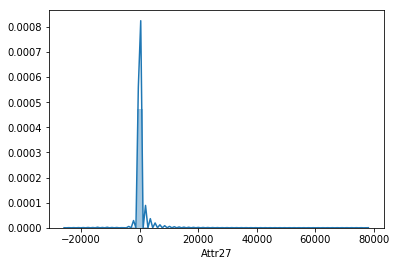

In [67]:
sns.distplot(data27)

In [65]:
data27.isnull()

6756    False
6757    False
6758     True
6759    False
6760    False
6761    False
6762    False
6763    False
6764    False
6765    False
6766    False
6767    False
6768    False
6769    False
6770    False
6771    False
6772    False
6773    False
6774    False
6775    False
6776    False
6777    False
6778    False
6779    False
6780    False
6781    False
6782    False
6783    False
6784    False
6785    False
        ...  
5880     True
5881    False
5882     True
5883     True
5884    False
5885    False
5886    False
5887     True
5888    False
5889    False
5890    False
5891     True
5892    False
5893    False
5894    False
5895     True
5896    False
5897     True
5898    False
5899    False
5900    False
5901     True
5902    False
5903     True
5904    False
5905    False
5906     True
5907     True
5908     True
5909     True
Name: Attr27, Length: 2091, dtype: bool

In [69]:
big_data['Attr27'].median()

1.0841

In [88]:
Q3 = big_data.quantile(0.75)
Q1 = big_data.quantile(0.25)

IQR = Q3 - Q1

min = Q1 - 1.5 * IQR

max = Q3 + 1.5 * IQR

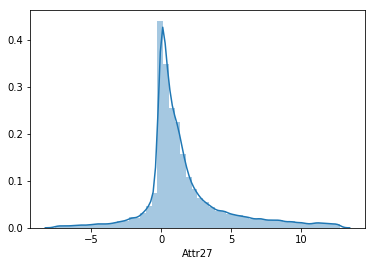

In [85]:
sns.distplot(filtered['Attr27'])

In [87]:
filtered[filtered['class'] == 1].shape

(980, 65)

In [104]:
for col in big_data.columns:
    big_data[col][big_data[col] < min[col]] = min[col]
    big_data[col][big_data[col] > max[col]] = max[col]

/home/sid/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sid/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: color kwarg must have one color per dataset

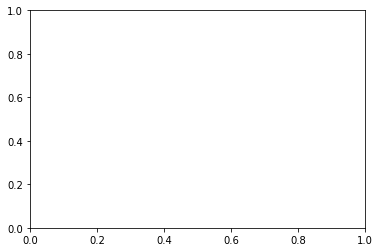

In [107]:
dsns.distplot(big_data.dropna())

In [101]:
big_data['Attr27'][big_data['Attr27'] < min['Attr27']] = min['Attr27']
big_data['Attr27'][big_data['Attr27'] > max['Attr27']] = max['Attr27']

/home/sid/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sid/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


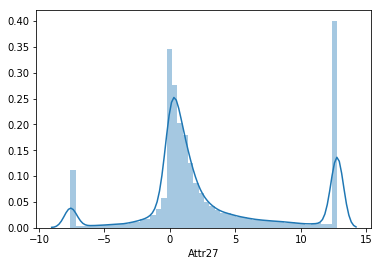

In [103]:
sns.distplot(big_data['Attr27'].dropna())

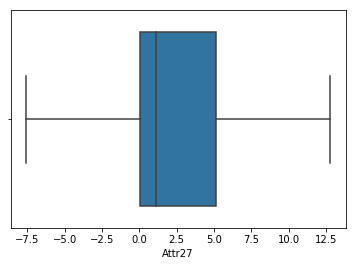

In [108]:
sns.boxplot(big_data['Attr27'].dropna())

In [109]:
big_data['Attr27'].median()

1.0841